# Simple Linear Regression
una regresion lineal simple sobre un dataset de videojuegos
* **Name Dataset:** VideoGames
* **URL:** https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

In [1]:
import pandas as pd #lib dataset management
import numpy as np #number lib
import matplotlib.pyplot as plt#plots and graphics

In [2]:
data = pd.read_csv("../datasets/VideoGameSalesRatings2016.csv")

In [110]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning
Necesitamos limpiar valores NaN y veremos si reducimos un poco el tamaño del dataset

In [111]:
data.shape #size: 16 columns, 16719 rows

(16719, 16)

In [112]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Necesitamos tratar los valores de _"critic_score"_ y _"user_score"_ con valores NaN.
* Podemos sacar un promedio
* rellenar con el anterior o siguiente
* eliminarlos

Como este dato resulta de suma importancia se decide **eliminar los juegos con criticas NaN**

## Revisando si hay campos vacios
Vere si tengo campos NaN o invalidos

In [113]:
pd.isnull(data["Critic_Score"]).values #retorna array
pd.isnull(data["Critic_Score"]).values.ravel().sum()#total de campos con valores NaN

8582

In [114]:
pd.isnull(data["User_Score"]).values #retorna array
pd.isnull(data["User_Score"]).values.ravel().sum()#total de campos con valores NaN

6704

* Tengo 8582 campos NaN en la columna _Critic_Score_ 
* Tengo 6704 campos NaN en la columna _User_Score_ 
Debo decidir que hacer con ellos **en este caso decido borrarlos, por que este es un valor importante para realizar la regresión**


In [115]:
data_new= data.dropna(subset=['Critic_Score', 'User_Score'])#asigno nuevo dataset con los NaN eliminados

In [116]:
pd.isnull(data_new["Critic_Score"]).values #retorna array
pd.isnull(data_new["Critic_Score"]).values.ravel().sum()

0

In [117]:
pd.isnull(data_new["User_Score"]).values #retorna array
pd.isnull(data_new["User_Score"]).values.ravel().sum()

0

In [118]:
data_new

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,4.0,tbd,NaN,Taito Corporation,E
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,10.0,tbd,NaN,Interchannel-Holon,E
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+


Ahora me quede con 8099 filas (se eliminaron mas de 8000 filas con valores NaN en Critic y User Score)

### Comprobando tipos de datos
Veremos los tipos de datos y solucionaremos problemas si es que existen

In [119]:
data_new.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

Tengo problemas con _User_Score_ pues su tipo de dato es _"object"_ necesito convertirlo a float para poder operar sus campos vacios

In [131]:
change = pd.to_numeric(data_new["User_Score"], errors="coerce")

In [132]:
data_new["User_Score"] = change

C:\Users\luisb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
data_new.dtypes#convertido a float 64 la columna de "User_score"

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

## Plots o graficos de datos
Usaremos graficos para ver la relacion entre algunas variables destacadas

In [126]:
%matplotlib inline 

### ScatterPlot crtic score vs global sales
Grafico para comprobar si existe una relacion entre las variables score y ventas globales

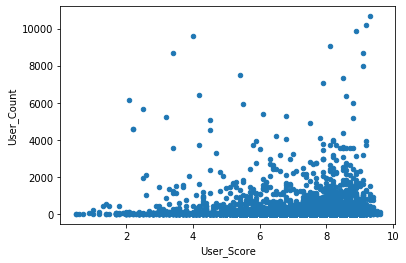

In [140]:
data_new.plot(kind="scatter", x="User_Score", y="User_Count")#pinto grafico